In [76]:
%matplotlib ipympl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

m: 0.4614587265779553
Equation: Log(I(t)) = 0.4614587265779553 t + 3.0953771007671307


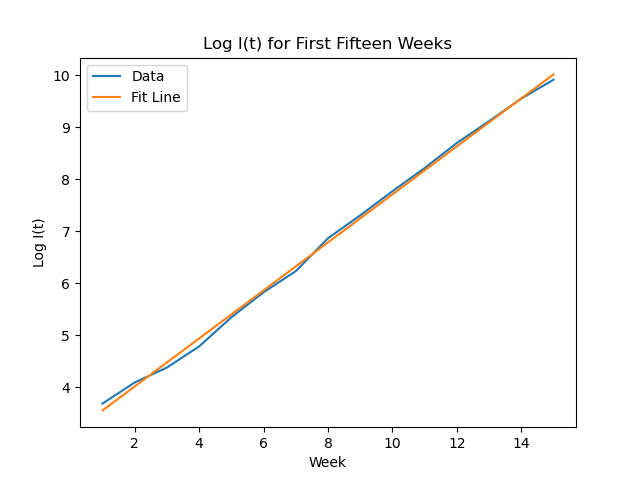

In [77]:
all_week_data = pd.read_csv("all_weeks.csv")
weeks = all_week_data["Week"].tolist()
cases = all_week_data["New Cases"].tolist()

n = 15
cases_first_fifteen = []
weeks_first_fifteen = []
number_to_dec_by = [0, 0]
for i in range(n):
    if i != 0:
        cases_first_fifteen.append(cases_first_fifteen[i-1] + cases[i] * 10)
    else:
        cases_first_fifteen.append(cases[i] * 10)
    weeks_first_fifteen.append(weeks[i])
    number_to_dec_by.append(cases[i]*10)
    total_cases[i] -= number_to_dec_by.pop(0)
    
cases_first_fifteen_log = np.log(cases_first_fifteen)
fit = np.polyfit(weeks_first_fifteen, cases_first_fifteen_log, 1)
fit_line = []
for i in range(n):
    fit_line.append(fit[0] * weeks_first_fifteen[i] + fit[1])
print("m:", fit[0])
print("Equation: Log(I(t)) =", fit[0], "t +", fit[1])
plt.figure(1)
plt.cla()
plt.plot(weeks_first_fifteen,cases_first_fifteen_log, label="Data")
plt.plot(weeks_first_fifteen, fit_line, label="Fit Line")
plt.xlabel("Week")
plt.ylabel("Log I(t)")
plt.legend()
plt.title("Log I(t) for First Fifteen Weeks")
plt.show()
plt.savefig('Problem1FifteenWeeks.png')

In [78]:
Gamma = 1 / 2
Mu = 1 / 100
m = fit[0]
R_0 = 1 + m / (Gamma + Mu)
print("R_0:", R_0)

sum_of_diff_y = np.sum((cases_first_fifteen_log - fit_line)**2)
num = np.sqrt(sum_of_diff_y / (n-2))
denom = np.sqrt(np.sum((weeks_first_fifteen - np.mean(weeks_first_fifteen))**2))
se = num / denom
lower_bound_m = m - 2.1604 * se
upper_bound_m = m + 2.1604 * se
confidence_interval_m = [lower_bound_m, upper_bound_m]

lower_bound_R_0 = 1 + lower_bound_m / (Gamma + Mu)
upper_bound_R_0 = 1 + upper_bound_m / (Gamma + Mu)
confidence_interval_R_0 = [lower_bound_R_0, upper_bound_R_0]

print("Confidence Interval for m:", confidence_interval_m)
print("Confidence Interval for R_0:", confidence_interval_R_0)

R_0: 1.9048210325057946
Confidence Interval for m: [0.4501439326639264, 0.4727735204919842]
Confidence Interval for R_0: [1.8826351620861301, 1.9270069029254593]


In [79]:
n = 1000
seroprevalence = 517 / n
R_0 = 1 / (1 - seroprevalence)
print("R_0:", R_0)

p = seroprevalence
q = 1 - seroprevalence
z = 1.96

lower_bound_sero = p - z * np.sqrt(p * q / n)
upper_bound_sero = p + z * np.sqrt(p * q / n)
confidence_interval_sero = [lower_bound_sero, upper_bound_sero]
print("Confidence Interval for Seroprevalence:", confidence_interval_sero)

lower_bound_R_0 = 1 / (1 - lower_bound_sero)
upper_bound_R_0 = 1 / (1 - upper_bound_sero)

confidence_interval_R_0 = [lower_bound_R_0, upper_bound_R_0]

print("Confidence Interval for R0:", confidence_interval_R_0)

R_0: 2.070393374741201
Confidence Interval for Seroprevalence: [0.4860275965156077, 0.5479724034843924]
Confidence Interval for R0: [1.945629752143622, 2.2122543130294745]


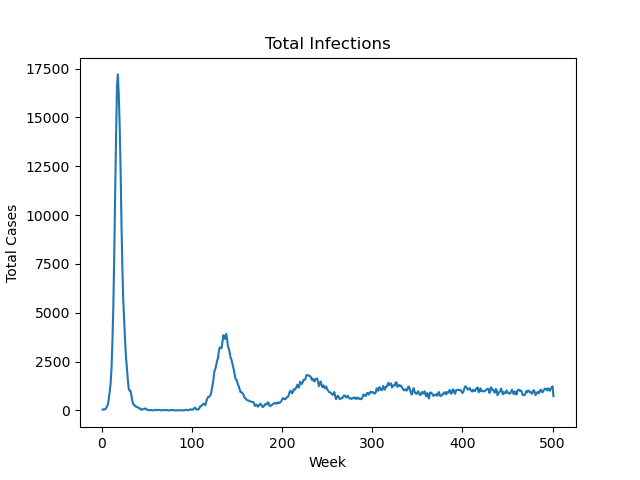

In [80]:
total_cases = []
number_to_dec_by = [0, 0]
for i in range(len(cases)):
    if i != 0:
        total_cases.append(total_cases[i-1] + cases[i] * 10)
    else:
      
        total_cases.append(cases[i]*10)
    number_to_dec_by.append(cases[i]*10)
    total_cases[i] -= number_to_dec_by.pop(0)
plt.figure(2)
plt.cla()
plt.plot(weeks, total_cases)
plt.xlabel("Week")
plt.ylabel("Total Cases")
plt.title("Total Infections")
plt.show()
plt.savefig('Problem1b.png')

In [81]:
Gamma = 1 / 2
Mu = 1 / 100
total_number_infections_eq = np.mean(total_cases[400:500])

print("Total number of infections at Equilibrium:", total_number_infections_eq)

ieq = total_number_infections_eq / 100000

R_0 = 1 / (1 - ieq*(Gamma / Mu + 1))
print(R_0)

Total number of infections at Equilibrium: 993.2
2.02647385443433
